In [ ]:
import os
import sys
from pathlib import Path # if you haven't already done so
file = Path(os.getcwd()).resolve()
parent, root = file.parent, file.parents[1]
print(parent, root)
sys.path.append(str(parent))
# sys.path.append("..")

# # Additionally remove the current file's directory from sys.path
# try:
#     sys.path.remove(str(parent))
# except ValueError: # Already removed
#     pass

/root/fruitao/drone/logic_guided_prompt/code /root/fruitao/drone/logic_guided_prompt


In [2]:
from drone_train import *

/root/fruitao/drone/logic_guided_prompt/code/data_augmentation /root/fruitao/drone/logic_guided_prompt/code


/root/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset_file_li=[r"../../text_annotation/desert.xlsx", r"../../text_annotation/disturbance.xlsx", r"../../text_annotation/factory.xlsx", r"../../text_annotation/island.xlsx", 
                 r"../../text_annotation/misc.xlsx", r"../../text_annotation/ocean.xlsx", r"../../text_annotation/rural.xlsx", r"../../text_annotation/urban.xlsx"
]

In [ ]:
old_data_dic=load_sensor_data(dataset_file_li)

templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:05) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.3m."], 'reachable_inpath': ["(0:05) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.3m."]}
templates:{'near_moving_object': ["(0:01) The drone is risking physical damage. It's flying too close to the moving car at a distance of 3.0m.", "(0:03) The drone is risking physical damage. It's flying too close to the moving car at a distance of 0.2m."], 'reachable_inpath': ["(0:03) The drone is facing the risk of physical damage. There is a car in the drone's flight path at a distance of 0.2m."]}
templates:{'flying_not_normal_frame': ['The drone is flying with a damaged frame.'], 'near_moving_object': ["(0:03) The 

In [ ]:
print(old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing'].keys())
print(old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['status'])
print(old_data_dic['https://drive.google.com/file/d/1oJ6t-VJN3rAmslsXszkVUzTZl4LJujeM/view?usp=sharing']['timestep'])

In [ ]:
(text_li, all_status_dic_li, all_timestep_dic_li, all_sensor_data_li), (templates_li, related_sensor_data_li), oneshot_examples_li=read_data_dict(old_data_dic)

In [ ]:
print(len(text_li), text_li[0])
print(len(all_status_dic_li), all_status_dic_li[0])
print(len(all_timestep_dic_li), all_timestep_dic_li[0])
print(len(all_sensor_data_li), all_sensor_data_li[0])

In [5]:
print(len(templates_li), templates_li[0])
print(len(related_sensor_data_li), related_sensor_data_li[0])

NameError: name 'templates_li' is not defined

In [ ]:
train_sensor_data, test_sensor_data=train_test_split(related_sensor_data_li)
train_templates, test_templates=train_test_split(templates_li)

# Train

In [100]:
!nvidia-smi

Tue Jun 13 14:59:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100 80G...  On   | 00000000:01:00.0 Off |                    0 |
| N/A   68C    P0   314W / 300W |  39641MiB / 81920MiB |     86%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100 80G...  On   | 00000000:22:00.0 Off |                    0 |
| N/A   

In [101]:
import torch
import math

from tqdm import tqdm
import numpy as np
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch.nn as nn
from sklearn.metrics import accuracy_score
from nltk.translate import meteor_score



In [102]:
device=torch.device("cuda:2")
torch.manual_seed(3407)

In [103]:
# n_tokens = 20

model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

initialize_from_vocab = True
batch_size = 32
n_epoch = 10

use_ce_loss = False
ce_loss = nn.CrossEntropyLoss()

n_tokens = len(WARNING_DL)
s_wte = SoftEmbedding(model.get_input_embeddings(), 
                      n_tokens=n_tokens, 
                      initialize_from_vocab=initialize_from_vocab)
model.set_input_embeddings(s_wte)

if torch.cuda.is_available():
    model = model.to(device)
    
optimizer = torch.optim.Adam(s_wte.parameters(), lr=0.5)
metrics_file='metrics_epoch_T5_soft_prompt_10_3407.csv'

from datetime import datetime

now = datetime.now()
dt_string = now.strftime("%d%m_%H%M%S")
save_model_file="./output/T5_soft_prompt_10_3407_"+dt_string

if torch.cuda.is_available():
    model = model.to(device)


/root/miniconda3/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [104]:
parameters = list(model.parameters())
for x in parameters[1:]:
    x.requires_grad = False

In [105]:
for x, y, m, dii, true_labels in generate_data(4, n_tokens, related_sensor_data_li, templates_li, tokenizer, device):
    assert dii.shape == y.shape
    outputs = model(input_ids=x, labels=y, attention_mask=m, decoder_input_ids=dii)
    assert outputs['logits'].shape[:2] == y.shape
    pred_labels = outputs['logits'][:, :, :].argmax(-1).detach().cpu().numpy()
    print("pred_labels:{}".format((pred_labels, pred_labels.shape)))
    break

pred_labels:(array([[32099,     3,     3,     2,     5,     6,     7,     3,     9,
           10,    11,    12,     5,     3,    15,    16,    17,    18,
           19,    20,    21,    22,     3,     1,     2,     2,     2,
            2,     2,     2,     2,     2,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3],
       [    3,     3,     3,     2,     5,     6,     7,     8,     9,
           10,    11,    12,    13,     3,    15,    16,    17,    18,
           19,    20,    21,    22,     3,     2,     2,     2,     2,
            2,     3,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,    41,    41,    41,    41,    41,
           41,    41,    41,    41,     1,     1,     1,     1,     1,
            1,     1,     1,     1],
       [    3,     3,     3,     2,     5,     6,     7,     

In [106]:
test_losses_epoch, bleu_score_epoch, rouge_score_epoch, meteor_score_epoch=train_with_prompt(model, tokenizer, device, n_epoch=n_epoch, batch_size=batch_size, n_tokens=n_tokens, train_input=train_sensor_data, train_label=train_templates, val_input=test_sensor_data, val_label=test_templates, optimizer=optimizer, ce_loss=ce_loss, use_ce_loss=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


epoch 0


dev: loss=0.2457: 100%|██████████| 21/21 [00:01<00:00, 11.35it/s]


meteor_avg_score 0.0004107634789452972
epoch 1


dev: loss=0.1598: 100%|██████████| 21/21 [00:01<00:00, 11.49it/s]


meteor_avg_score 0.009604869880605082
epoch 2


dev: loss=0.1276: 100%|██████████| 21/21 [00:01<00:00, 11.43it/s]


meteor_avg_score 0.027834195574143204
epoch 3


dev: loss=0.1102: 100%|██████████| 21/21 [00:01<00:00, 11.48it/s]


meteor_avg_score 0.08041869018101884
epoch 4


dev: loss=0.0994: 100%|██████████| 21/21 [00:01<00:00, 11.45it/s]


meteor_avg_score 0.029186486412651824
epoch 5


dev: loss=0.0938: 100%|██████████| 21/21 [00:01<00:00, 11.37it/s]


meteor_avg_score 0.06705562105936728
epoch 6


dev: loss=0.0921: 100%|██████████| 21/21 [00:01<00:00, 11.35it/s]


meteor_avg_score 0.06079654184667615
epoch 7


dev: loss=0.0904: 100%|██████████| 21/21 [00:01<00:00, 11.34it/s]


meteor_avg_score 0.0796381856699216
epoch 8


dev: loss=0.0868: 100%|██████████| 21/21 [00:01<00:00, 11.36it/s]


meteor_avg_score 0.06326868984837933
epoch 9


dev: loss=0.0912: 100%|██████████| 21/21 [00:01<00:00, 11.30it/s]


meteor_avg_score 0.08277477184863583


In [107]:
(rouge1_precision_epoch, rouge1_recall_epoch, rouge1_fmeasure_epoch), (rouge1_precision_epoch, rouge1_recall_epoch, rouge1_fmeasure_epoch), (rougeL_precision_epoch, rougeL_recall_epoch, rougeL_fmeasure_epoch), (rougeLsum_precision_epoch, rougeLsum_recall_epoch, rougeLsum_fmeasure_epoch), (bleu_avg_score_epoch, bleu_1_score_epoch, bleu_2_score_epoch, bleu_3_score_epoch, bleu_4_score_epoch), (meteor_score_epoch)=save_metrics(test_losses_epoch, bleu_score_epoch, rouge_score_epoch, meteor_score_epoch, metrics_file=metrics_file)

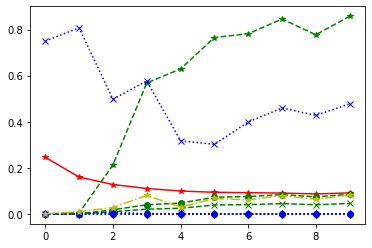

In [108]:
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

plt.plot(test_losses_epoch, '*-r')

plt.plot(rouge1_precision_epoch, '*--g')
plt.plot(rouge1_recall_epoch, 'x--g')
plt.plot(rouge1_fmeasure_epoch, 'o--g')

plt.plot(bleu_avg_score_epoch, '*:b')
plt.plot(bleu_1_score_epoch, 'x:b')
plt.plot(bleu_2_score_epoch, '+:b')
plt.plot(bleu_3_score_epoch, 'o:b')
plt.plot(bleu_4_score_epoch, 'd:b')

plt.plot(meteor_score_epoch, '*-.y')

plt.show()

In [109]:
torch.save(model.state_dict(), save_model_file)

# Metrics

In [19]:
model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")
n_tokens = len(WARNING_DL)
s_wte = SoftEmbedding(model.get_input_embeddings(), 
                      n_tokens=n_tokens, 
                      initialize_from_vocab=initialize_from_vocab)
model.set_input_embeddings(s_wte)

/root/miniconda3/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:163: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [20]:
model.load_state_dict(torch.load("./output/T5_soft_prompt_10_3407"))
if torch.cuda.is_available():
    model = model.to(device)

In [57]:
def eval_with_prompt(model, tokenizer, device, batch_size, n_tokens,
                     val_input, val_label, optimizer, ce_loss, use_ce_loss=False):
    dev_total_batch = math.ceil(len(val_input) / batch_size)
    
    all_true_labels = []
    all_pred_labels = []
    output_max_pred=[]
    test_losses = []
        
    with torch.no_grad():
            pbar = tqdm(enumerate(generate_data(batch_size, n_tokens, val_input, val_label, tokenizer, device)), total=dev_total_batch)
            for i, (x, y, m, dii, true_labels) in pbar:
                
                all_true_labels += true_labels
                outputs = model(input_ids=x, labels=y, attention_mask=m, decoder_input_ids=dii)

                output_ids=outputs.logits[:, n_tokens:, :]
                max_pred_ids=outputs.logits[:, n_tokens:, :].argmax(-1).detach().cpu().numpy().tolist()
                
                for i, (max_pred_ids_unbatch, output_ids_unbatch) in enumerate(zip(max_pred_ids, output_ids)):
                    max_pred_ids_unbatch=np.array(max_pred_ids_unbatch)
                    # output_ids[i]=output_ids_unbatch[max_pred_ids_unbatch!=0]
                    max_pred_ids[i]=max_pred_ids_unbatch[max_pred_ids_unbatch!=0].tolist()
                
#                 print("tokenizer.batch_decode(max_pred_ids)", tokenizer.batch_decode(max_pred_ids))
                output_max_pred.extend(tokenizer.batch_decode(max_pred_ids))
                # print("output_max_pred", output_max_pred)

                loss = outputs.loss
                loss_value = float(loss.detach().cpu().numpy().tolist()) / batch_size
                test_losses.append(loss_value)

                pred_labels = outputs['logits'][:, :, :].argmax(-1).detach().cpu().numpy().tolist()
                all_pred_labels += pred_labels
                pbar.set_description(f'dev: loss={np.mean(test_losses):.4f}')
                
    return output_max_pred

In [58]:
output_max_pred=eval_with_prompt(model, tokenizer, device, batch_size, n_tokens,
                     val_input=test_sensor_data, val_label=test_templates, optimizer=optimizer, ce_loss=ce_loss, use_ce_loss=False)
print(len(output_max_pred), len(output_max_pred[0]))

dev: loss=0.0912: 100%|██████████| 21/21 [00:04<00:00,  4.59it/s]

660 115


In [60]:
print(len(output_max_pred), output_max_pred[0])
print(len(test_sensor_data), test_sensor_data[0])
print(len(test_templates), test_templates[0])

660 :05) The drone is facing facing risk of of damage damage. is is flying flying close to  at at at         m is is is
660 {"time_stamp": "0:05", "name": NaN, "Distance": 0.5}
660 (0:05) The drone is facing the risk of physical damage. It's flying too close to nan at a distance of 0.5m, and the pilot is not experienced.


In [74]:
# predictions: An iterator over tokenized predictions. Each prediction is a list.
# [
#     ["michael", "dahlquist", "(", "december", "22", ",", "1965", "--", "july",
#      "14", ",", "2005", ")", "was", "a", "drummer", "in", "the", "california",
#      "band", "grateful", "dead", "."],
# ]
def __max_pred_as_generation(output_max_pred):
    result=[]
    for line in output_max_pred:
        tmp=[line.lower().split()]
        result.append(tmp)
        # print("__max_pred_as_generation_reader", tmp)
        
    return result
        
# references: An iterator over lists of tokenized references. Each prediction can have multiple references.
# [[
#     "michael", "dahlquist", "(", "december", "22", ",", "1965", "--", "july",
#     "14", ",", "2005", ")", "was", "a", "drummer", "in", "the", "seattle",
#     "band", "silkworm", "."
# ]]
def __template_as_refer(test_templates):
    result=[]
    for line in test_templates:
        tmp=line.lower().split()
        result.append(tmp)
        # print("__template_as_refer_reader", tmp)
        
    return result
        
# tables: An iterator over the tables
# TEST_TABLE = [
#     [["birth", "name"], ["michael", "dahlquist"]],
#     [["born"], ["december", "22", ",", "1965"]],
#     [["birth", "place"], ["seattle", ",", "washington"]],
#     [["died"], ["july", "14", ",", "2005"]],
#     [["death", "place"], ["skokie", ",", "illinois"]],
#     [["genres"], ["male"]],
#     [["occupation(s)"], ["drummer"]],
#     [["instruments"], ["drums"]],
# ]
def __sensor_data_as_table(test_sensor_data):
    result=[]
    for line in test_sensor_data:
        related_sensor_data=json.loads(line)
        # print("__sensor_data_as_table_reader related_sensor_data", related_sensor_data)
        
        tmp=[]
        for key, value in related_sensor_data.items():
            key_tokens=key.lower().split()
            value_tokens=str(value).lower().split()
            
#             print("__sensor_data_as_table_reader key", key)
#             print("__sensor_data_as_table_reader key_tokens", key_tokens)
            
#             print("__sensor_data_as_table_reader value", value)
#             print("__sensor_data_as_table_reader value_tokens", value_tokens)
            
            tmp.append([key_tokens, value_tokens])
        
        result.append(tmp)
        # print("__sensor_data_as_table_reader", tmp)
    
    return result

In [75]:
generation_it = __max_pred_as_generation(output_max_pred)
reference_it = __template_as_refer(test_templates)
table_it = __sensor_data_as_table(test_sensor_data)

print("generation_it", type(generation_it), generation_it[0], generation_it[:3])
print("reference_it", type(reference_it), reference_it[0], reference_it[:3])
print("table_it", type(table_it), table_it[0], table_it[:3])

generation_it <class 'list'> [[':05)', 'the', 'drone', 'is', 'facing', 'facing', 'risk', 'of', 'of', 'damage', 'damage.', 'is', 'is', 'flying', 'flying', 'close', 'to', 'at', 'at', 'at', 'm', 'is', 'is', 'is']] [[[':05)', 'the', 'drone', 'is', 'facing', 'facing', 'risk', 'of', 'of', 'damage', 'damage.', 'is', 'is', 'flying', 'flying', 'close', 'to', 'at', 'at', 'at', 'm', 'is', 'is', 'is']], [[':02)', 'the', 'drone', 'is', 'facing', 'risk', 'risk', 'of', 'physical', 'damage', 'damage', 'damage', 'is', 'is', 'is', 'at', 'at', 'at', 'at', 'is', 'is', 'is']], [['drone', 'is', 'is', 'is', 'is', 'of', 'of', 'of', 'of', 'drone', 'drone']]]
reference_it <class 'list'> ['(0:05)', 'the', 'drone', 'is', 'facing', 'the', 'risk', 'of', 'physical', 'damage.', "it's", 'flying', 'too', 'close', 'to', 'nan', 'at', 'a', 'distance', 'of', '0.5m,', 'and', 'the', 'pilot', 'is', 'not', 'experienced.'] [['(0:05)', 'the', 'drone', 'is', 'facing', 'the', 'risk', 'of', 'physical', 'damage.', "it's", 'flying', 

In [79]:
parent_score_li=[]

for pred, refer, table in zip(generation_it, reference_it, table_it):
    # print("pred", type(pred), pred)
    # print("refer", type(refer), refer)
    # print("table", type(table), table)
    _, _, parent_score, _ = parent(pred, [[refer]], [table], lambda_weight=None)
    parent_score_li.append(parent_score)

print("parent_score_li", len(parent_score_li), parent_score_li[0])

parent_score_li 660 1.9998667722886627e-05


In [26]:
entail_method=overlap_probability
precision, recall, f_score, all_f = parent(
    generation_it,
    [reference_it],
    table_it,
    lambda_weight=None,
    smoothing=0.00001,
    entailment_fn=entail_method)

print("precision", precision)
print("recall", recall)
print("f_score", f_score)
print("all_f", all_f)

TypeError: unhashable type: 'list'

In [70]:

TEST_PREDS = [[['(0:05)', 'the', 'drone', 'is', 'facing', 'the', 'risk', 'of', 'physical']], [['(0:02)', 'the', 'drone', 'is', 'facing']], [['the', 'flying', 'drone', 'is', 'runing', 'out', 'of', 'battery']]]
TEST_REF = [['(0:05)', 'the', 'drone', 'is', 'facing', 'the', 'risk', 'of', 'physical', 'damage.', "it's", 'flying', 'too', 'close', 'to', 'nan', 'at', 'a', 'distance', 'of', '0.5m,', 'and', 'the', 'pilot', 'is', 'not', 'experienced.'], ['(0:02)', 'the', 'drone', 'is', 'facing', 'the', 'risk', 'of', 'physical', 'damage.', "it's", 'flying', 'too', 'close', 'to', 'booth', 'at', 'a', 'distance', 'of', '0.5m,', 'and', 'the', 'pilot', 'is', 'not', 'experienced.'], ['the', 'flying', 'drone', 'is', 'runing', 'out', 'of', 'battery', 'with', 'only', '0%', 'charge.']]
TEST_TABLE = [[['time_stamp'], ['0:05']], [['name'], ['nan']], [['distance'], ['0.5']]], [[['time_stamp'], ['0:02']], [['name'], ['booth']], [['distance'], ['0.5']]], [[['battery_level'], ['0']]]

# _, _, parent_score, _=parent(TEST_PREDS, [TEST_REF], [TEST_TABLE], lambda_weight=None)
# print(parent_score)

def test_parent():
    for pred, score in zip(TEST_PREDS, TEST_SCORES):
      print("pred", type(pred), pred)
      print("prediction = %s" % " ".join(pred[0]))
      _, _, parent_score, _ = parent(pred, [TEST_REF],
                                                     [TEST_TABLE],
                                                     lambda_weight=None)
      print(parent_score)
      

test_parent()

pred <class 'list'> [['(0:05)', 'the', 'drone', 'is', 'facing', 'the', 'risk', 'of', 'physical']]
prediction = (0:05) the drone is facing the risk of physical


ValueError: not enough values to unpack (expected 3, got 1)

In [67]:

TEST_PREDS = [
    ["michael", "dahlquist", "(", "december", "22", ",", "1965", "--", "july",
     "14", ",", "2005", ")", "was", "a", "drummer", "in", "the", "california",
     "band", "grateful", "dead", "."],
]

TEST_REF = [
    "michael", "dahlquist", "(", "december", "22", ",", "1965", "--", "july",
    "14", ",", "2005", ")", "was", "a", "drummer", "in", "the", "seattle",
    "band", "silkworm", "."
]

TEST_TABLE = [
    [["birth", "name"], ["michael", "dahlquist"]],
    [["born"], ["december", "22", ",", "1965"]],
    [["birth", "place"], ["seattle", ",", "washington"]],
    [["died"], ["july", "14", ",", "2005"]],
    [["death", "place"], ["skokie", ",", "illinois"]],
    [["genres"], ["male"]],
    [["occupation(s)"], ["drummer"]],
    [["instruments"], ["drums"]],
]
TEST_SCORES = [0.772, 0.836, 0.848]



In [68]:
_, _, parent_score, _=parent(TEST_PREDS, [TEST_REF],TEST_TABLE,lambda_weight=None)
print(parent_score)

0.08476999753365962


In [69]:
def test_parent():
    for pred, score in zip(TEST_PREDS, TEST_SCORES):
      
      print("prediction = %s" % " ".join(pred))
        
      print("[pred]", type([pred]), [pred])
      print("[[TEST_REF]]", type([[TEST_REF]]), [[TEST_REF]])
      print("[TEST_TABLE]", type([TEST_TABLE]), [TEST_TABLE])
      _, _, parent_score, _ = parent([pred], [[TEST_REF]],
                                                     [TEST_TABLE],
                                                     lambda_weight=None)
      print(parent_score)

test_parent()

prediction = michael dahlquist ( december 22 , 1965 -- july 14 , 2005 ) was a drummer in the california band grateful dead .
[pred] <class 'list'> [['michael', 'dahlquist', '(', 'december', '22', ',', '1965', '--', 'july', '14', ',', '2005', ')', 'was', 'a', 'drummer', 'in', 'the', 'california', 'band', 'grateful', 'dead', '.']]
[[TEST_REF]] <class 'list'> [[['michael', 'dahlquist', '(', 'december', '22', ',', '1965', '--', 'july', '14', ',', '2005', ')', 'was', 'a', 'drummer', 'in', 'the', 'seattle', 'band', 'silkworm', '.']]]
[TEST_TABLE] <class 'list'> [[[['birth', 'name'], ['michael', 'dahlquist']], [['born'], ['december', '22', ',', '1965']], [['birth', 'place'], ['seattle', ',', 'washington']], [['died'], ['july', '14', ',', '2005']], [['death', 'place'], ['skokie', ',', 'illinois']], [['genres'], ['male']], [['occupation(s)'], ['drummer']], [['instruments'], ['drums']]]]
0.7717486485694235
